<a href="https://colab.research.google.com/github/SrujanV010/Used-Car-Price-Predictor/blob/main/Used_Car_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Read the DataSet

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Miner Project/used_car_dataset.csv')

###Understand the DataSet

In [ ]:
df.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             2105 non-null   object
 1   car_price_in_rupees  2105 non-null   object
 2   kms_driven           2105 non-null   object
 3   fuel_type            2105 non-null   object
 4   city                 2105 non-null   object
 5   year_of_manufacture  2105 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 98.8+ KB


In [ ]:
df.describe()

,year_of_manufacture
count,2105.000000
mean,2017.022803
std,2.818066
min,2004.000000
25%,2015.000000
50%,2017.000000
75%,2019.000000
max,2022.000000


In [ ]:
df.isnull().sum()

car_name               0
car_price_in_rupees    0
kms_driven             0
fuel_type              0
city                   0
year_of_manufacture    0
dtype: int64

In [ ]:
df['car_price_in_rupees'].str.contains('Lakh').sum()

2098

In [ ]:
df['car_price_in_rupees'].str.contains('Crore').sum()

5

In [ ]:
df[~((df['car_price_in_rupees'].str.contains('Lakh')) | (df['car_price_in_rupees'].str.contains('Crore')))]

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
499,Tata Indica V2 DLE BS-III,"₹ 60,000","50,000 km",Diesel,Pallikarnai,2007
1635,Maruti Suzuki Estilo LXi,"₹ 99,991","29,012 km",Petrol,Kolkata,2008


### **Data preprocessing and cleaning**

In [ ]:
import re

In [ ]:
def convert_price_to_numeric(price):
    price = price.replace('₹', '').replace(',', '').strip()
    value = 0

    if 'Lakh' in price:
        value = float(re.findall(r'\d+\.\d+|\d+', price)[0]) * 100000
    elif 'Crore' in price:
        value = float(re.findall(r'\d+\.\d+|\d+', price)[0]) * 10000000
    else:
        value = float(re.findall(r'\d+\.\d+|\d+', price)[0])

    return value

In [ ]:
df['Price_Numeric'] = df['car_price_in_rupees'].apply(convert_price_to_numeric)

In [ ]:
df.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,Price_Numeric
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016,445000.0
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019,293000.0
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021,2249000.0
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016,695000.0
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019,1200000.0


In [ ]:
df[df['car_price_in_rupees'].str.contains('Crore')]

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,Price_Numeric
21,Porsche 718 Boxster,₹ 1.15 Crore,"6,500 km",Petrol,Pune,2020,11500000.0
313,Land Rover Range Rover Sport SDV6 SE,₹ 1.23 Crore,"39,012 km",Diesel,Thane,2019,12300000.0
1340,Mercedes-Benz S-Class Maybach S 500,₹ 1.19 Crore,"24,500 km",Petrol,Kolkata,2017,11900000.0
1392,Land Rover Range Rover 4.4 SDV8 Autobiography LWB,₹ 1.95 Crore,"45,000 km",Diesel,Ahmedabad,2018,19500000.0
1850,Land Rover Range Rover Sport SE 3.0 Diesel [20...,₹ 1.36 Crore,"36,000 km",Diesel,Bangalore,2019,13600000.0


In [ ]:
df[df['car_price_in_rupees'].str.contains(',')]

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,Price_Numeric
499,Tata Indica V2 DLE BS-III,"₹ 60,000","50,000 km",Diesel,Pallikarnai,2007,60000.0
1635,Maruti Suzuki Estilo LXi,"₹ 99,991","29,012 km",Petrol,Kolkata,2008,99991.0


In [ ]:
df[df['car_price_in_rupees'].str.contains('Lakh')].count()

car_name               2098
car_price_in_rupees    2098
kms_driven             2098
fuel_type              2098
city                   2098
year_of_manufacture    2098
Price_Numeric          2098
dtype: int64

In [ ]:
df[df['kms_driven'].str.contains('km')].count()

car_name               2105
car_price_in_rupees    2105
kms_driven             2105
fuel_type              2105
city                   2105
year_of_manufacture    2105
Price_Numeric          2105
dtype: int64

In [ ]:
def km_numeric(distance):
  km = distance.split()[0]
  return float(km.replace(',',''))

In [ ]:
df['Distance'] = df['kms_driven'].apply(km_numeric)

In [ ]:
df.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,Price_Numeric,Distance
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016,445000.0,22402.0
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019,293000.0,10344.0
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021,2249000.0,12999.0
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016,695000.0,45000.0
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019,1200000.0,11193.0


In [ ]:
df.isnull().sum()

car_name               0
car_price_in_rupees    0
kms_driven             0
fuel_type              0
city                   0
year_of_manufacture    0
Price_Numeric          0
Distance               0
dtype: int64

In [ ]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'Diesel + 1', 'Electric', 'CNG', 'Petrol + 1',
       'Hybrid', 'LPG'], dtype=object)

In [ ]:
df['fuel_type'].value_counts()

Petrol        1348
Diesel         636
CNG             82
Petrol + 1      18
Electric        10
Diesel + 1       7
Hybrid           2
LPG              2
Name: fuel_type, dtype: int64

In [ ]:
df['city'].unique()

array(['Mumbai', 'Kolkata', 'Bangalore', 'Thane', 'Chennai', 'Ahmedabad',
       'Pallikarnai', 'Hyderabad', 'Pune', 'Gurgaon', 'Delhi', 'Noida',
       'Faridabad', 'Thiruvallur', 'Ambattur', 'Poonamallee'],
      dtype=object)

In [ ]:
df['city'].value_counts()

Bangalore      248
Pune           247
Mumbai         246
Ahmedabad      246
Kolkata        245
Hyderabad      245
Thane          244
Delhi          190
Chennai         78
Noida           41
Ambattur        19
Pallikarnai     17
Thiruvallur     16
Gurgaon          8
Poonamallee      8
Faridabad        7
Name: city, dtype: int64

In [ ]:
df[df.duplicated()]

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,Price_Numeric,Distance
154,Kia Seltos GTX 1.4 Dual Tone,₹ 16.2 Lakh,"51,605 km",Petrol,Pune,2019,1620000.0,51605.0
295,Hyundai Eon Magna [2011-2012],₹ 3.2 Lakh,"33,146 km",Petrol,Ahmedabad,2015,320000.0,33146.0
351,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.05 Lakh,"72,757 km",Petrol,Delhi,2016,405000.0,72757.0
496,Mercedes-Benz CLA 200 CDI Sport,₹ 16.49 Lakh,"51,500 km",Diesel,Kolkata,2015,1649000.0,51500.0
572,Hyundai i10 Magna 1.2 Kappa2,₹ 3.49 Lakh,"75,619 km",Petrol,Chennai,2014,349000.0,75619.0
...,...,...,...,...,...,...,...,...
2036,Hyundai Elite i20 Asta 1.2,₹ 4.46 Lakh,"54,136 km",Petrol,Kolkata,2015,446000.0,54136.0
2047,Hyundai Elite i20 Magna Executive 1.2,₹ 6.9 Lakh,"45,000 km",Petrol,Ahmedabad,2018,690000.0,45000.0
2055,Hyundai Santro Sportz,₹ 5.89 Lakh,"47,873 km",Petrol,Pune,2020,589000.0,47873.0
2079,Skoda Rapid Ambition 1.6 MPI AT,₹ 8.99 Lakh,"57,702 km",Petrol,Bangalore,2018,899000.0,57702.0


In [ ]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [ ]:
df.loc[154]

car_name               BMW 5 Series 520d Sedan
car_price_in_rupees                  ₹ 43 Lakh
kms_driven                           40,000 km
fuel_type                               Diesel
city                                 Ahmedabad
year_of_manufacture                       2017
Price_Numeric                        4300000.0
Distance                               40000.0
Name: 154, dtype: object

In [ ]:
len(df)

2013

Exploratory data analysis (EDA)

Text(0.5, 1.0, 'Correlation Overview of Variables')

<Figure size 1500x1200 with 0 Axes>

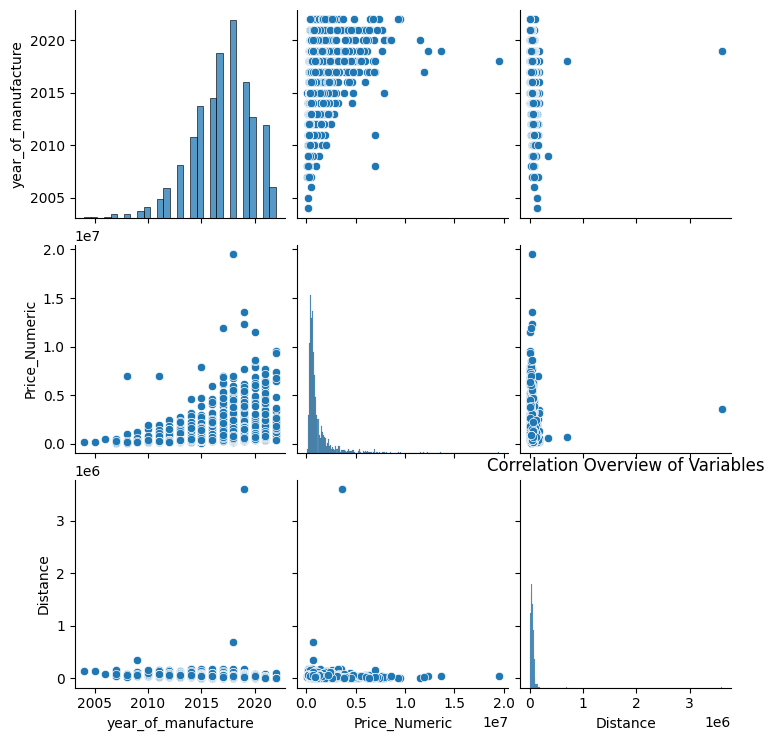

In [ ]:
plt.figure(figsize=(10,8),dpi=150)
sns.pairplot(data=df)
plt.title('Correlation Overview of Variables')

In [ ]:
def brand(name):
  return name.split()[0]

In [ ]:
df['Brand'] = df['car_name'].apply(brand)
df['Brand']

0       Hyundai
1        Maruti
2          Tata
3        Maruti
4          Jeep
         ...   
2008       Ford
2009       MINI
2010    Hyundai
2011     Maruti
2012    Hyundai
Name: Brand, Length: 2013, dtype: object

In [ ]:
df['Brand'].value_counts()

Maruti           539
Hyundai          417
Honda            220
Toyota            86
Tata              81
Ford              69
Mercedes-Benz     68
Renault           65
Mahindra          64
Audi              62
Volkswagen        59
BMW               55
Skoda             45
Kia               39
MG                26
Jeep              26
Nissan            18
Land              18
Volvo             13
Datsun            13
Jaguar             9
Chevrolet          6
Isuzu              4
MINI               4
Fiat               3
Porsche            2
Citroen            1
Bentley            1
Name: Brand, dtype: int64

In [ ]:
df.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,Price_Numeric,Distance,Brand
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016,445000.0,22402.0,Hyundai
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019,293000.0,10344.0,Maruti
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021,2249000.0,12999.0,Tata
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016,695000.0,45000.0,Maruti
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019,1200000.0,11193.0,Jeep


In [ ]:
def Type_of_Car(price):
  if price <= 800000:
    return 'Budget'
  elif price > 800000 and price <= 2000000:
    return 'MidRange'
  elif price >2000000 and price < 10000000:
    return 'Luxury'
  else:
      return 'UltraLuxury'

In [ ]:
df['Category'] = df['Price_Numeric'].apply(Type_of_Car)

In [ ]:
df.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,Price_Numeric,Distance,Brand,Category
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016,445000.0,22402.0,Hyundai,Budget
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019,293000.0,10344.0,Maruti,Budget
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021,2249000.0,12999.0,Tata,Luxury
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016,695000.0,45000.0,Maruti,Budget
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019,1200000.0,11193.0,Jeep,MidRange


Text(0.5, 1.0, 'Count of Categories')

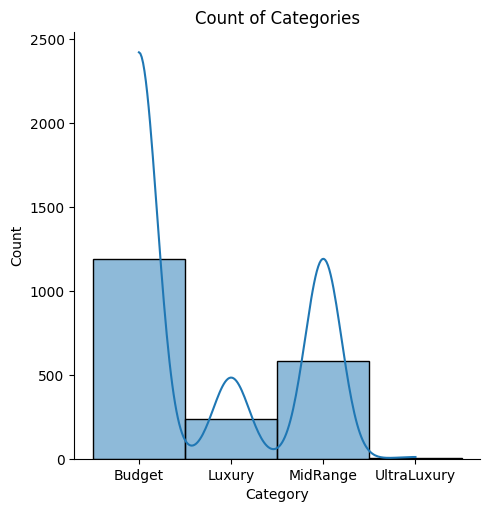

In [ ]:
sns.displot(x='Category',data = df,kde=True)
plt.title('Count of Categories')

In [ ]:
df['Category'].value_counts()

Budget         1187
MidRange        584
Luxury          237
UltraLuxury       5
Name: Category, dtype: int64

In [ ]:
df['fuel_type'].value_counts()

Petrol        1283
Diesel         613
CNG             79
Petrol + 1      18
Electric         9
Diesel + 1       7
Hybrid           2
LPG              2
Name: fuel_type, dtype: int64

Text(0.5, 1.0, 'Count of fuels')

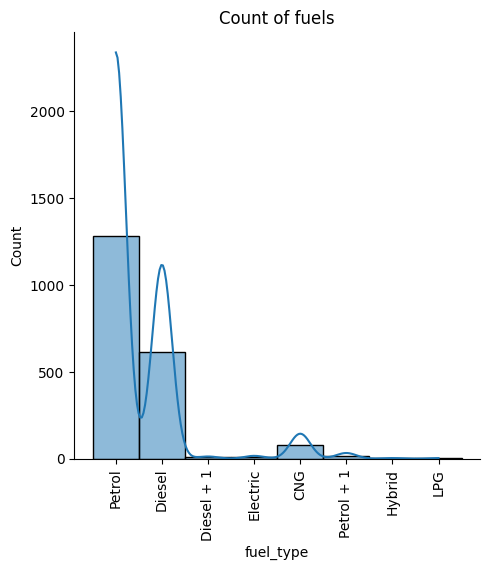

In [ ]:
sns.displot(x='fuel_type',data = df,kde=True)
plt.xticks(rotation=90)
plt.title('Count of fuels')

Text(0.5, 1.0, 'Price Variations Based on Fuel Type')

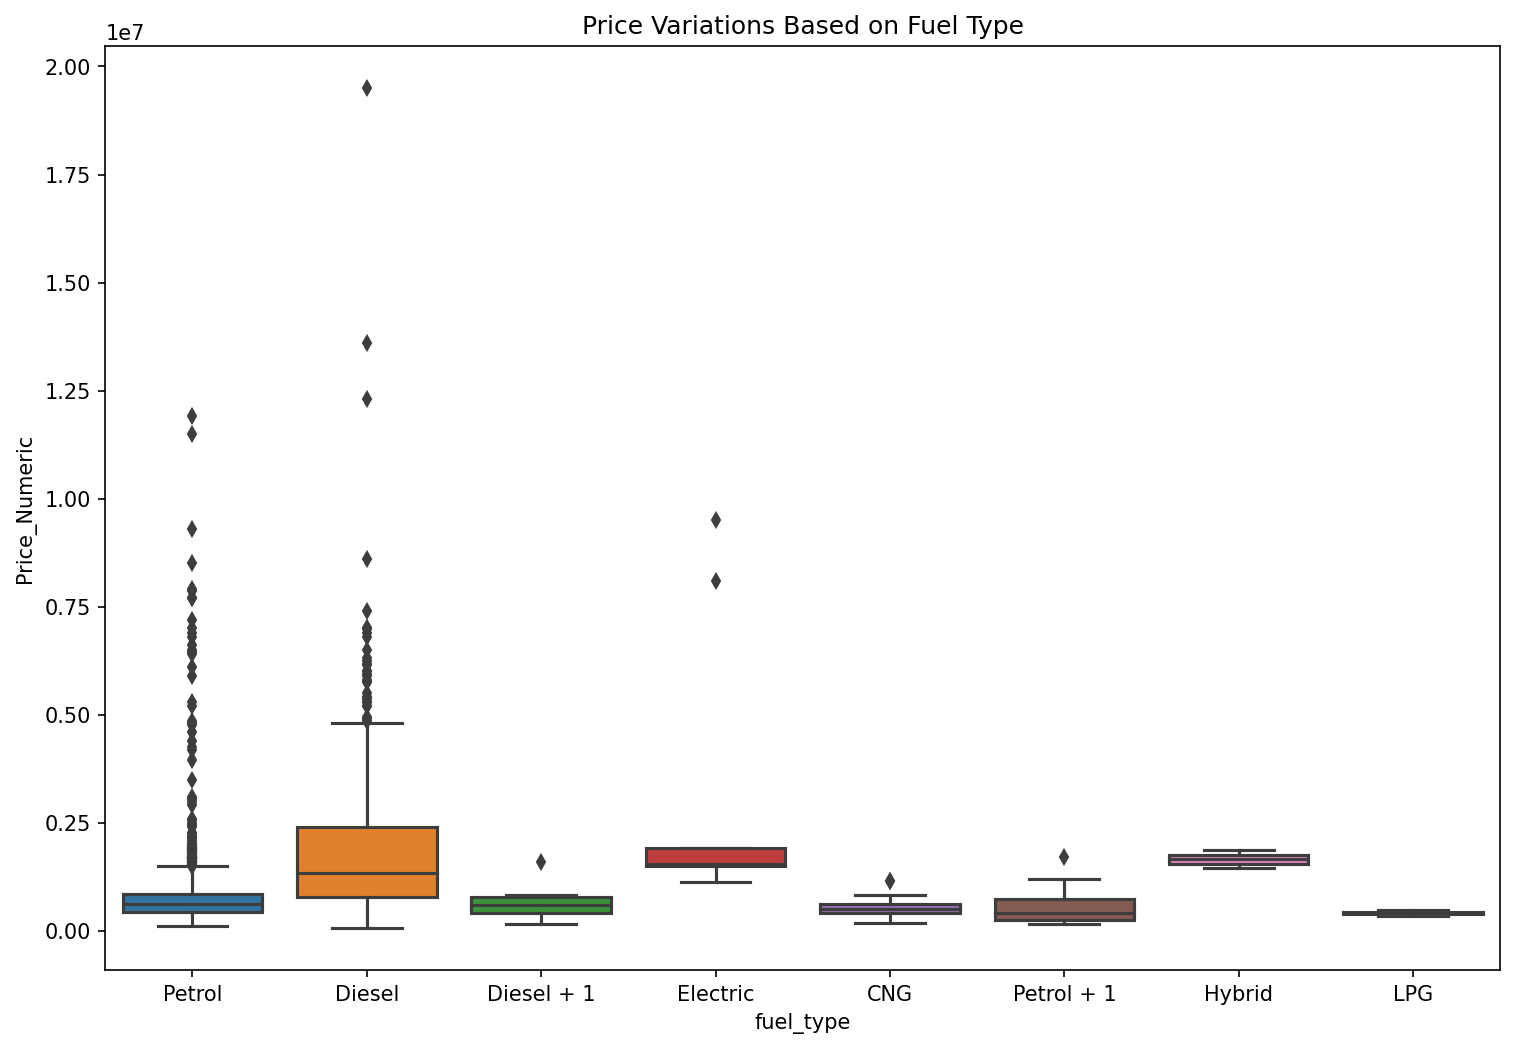

In [ ]:
plt.figure(figsize=(12,8),dpi=150)
sns.boxplot(x='fuel_type',y='Price_Numeric',data=df)
plt.title("Price Variations Based on Fuel Type")

In [ ]:
def filter_fuels(fuel):
  if fuel == 'Petrol' or fuel == 'Diesel' or fuel == 'CNG':
    return fuel
  else:
    return 'Other'

In [ ]:
df['Filtered_Fuels'] = df['fuel_type'].apply(filter_fuels)


In [ ]:
df.head(15)

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,Price_Numeric,Distance,Brand,Category,Filtered_Fuels
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016,445000.0,22402.0,Hyundai,Budget,Petrol
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019,293000.0,10344.0,Maruti,Budget,Petrol
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021,2249000.0,12999.0,Tata,Luxury,Diesel
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016,695000.0,45000.0,Maruti,Budget,Petrol
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019,1200000.0,11193.0,Jeep,MidRange,Petrol
5,Maruti Suzuki Eeco 5 STR WITH A/C+HTR [2019-2020],₹ 3.72 Lakh,"42,906 km",Petrol,Chennai,2017,372000.0,42906.0,Maruti,Budget,Petrol
6,Hyundai Creta SX Plus 1.6 AT CRDI,₹ 11.5 Lakh,"66,602 km",Diesel,Mumbai,2017,1150000.0,66602.0,Hyundai,MidRange,Diesel
7,Maruti Suzuki Ertiga VXi AT,₹ 10.39 Lakh,"13,189 km",Petrol,Bangalore,2019,1039000.0,13189.0,Maruti,MidRange,Petrol
8,Toyota Etios Liva G,₹ 3.75 Lakh,"67,815 km",Petrol,Mumbai,2013,375000.0,67815.0,Toyota,Budget,Petrol
9,Renault Kwid 1.0 RXT AMT Opt [2016-2019],₹ 4.25 Lakh,"19,509 km",Petrol,Mumbai,2018,425000.0,19509.0,Renault,Budget,Petrol


Text(0.5, 1.0, 'Price Variations Based on Fuel Type (Petrol, Diesel, CNG, Other)')

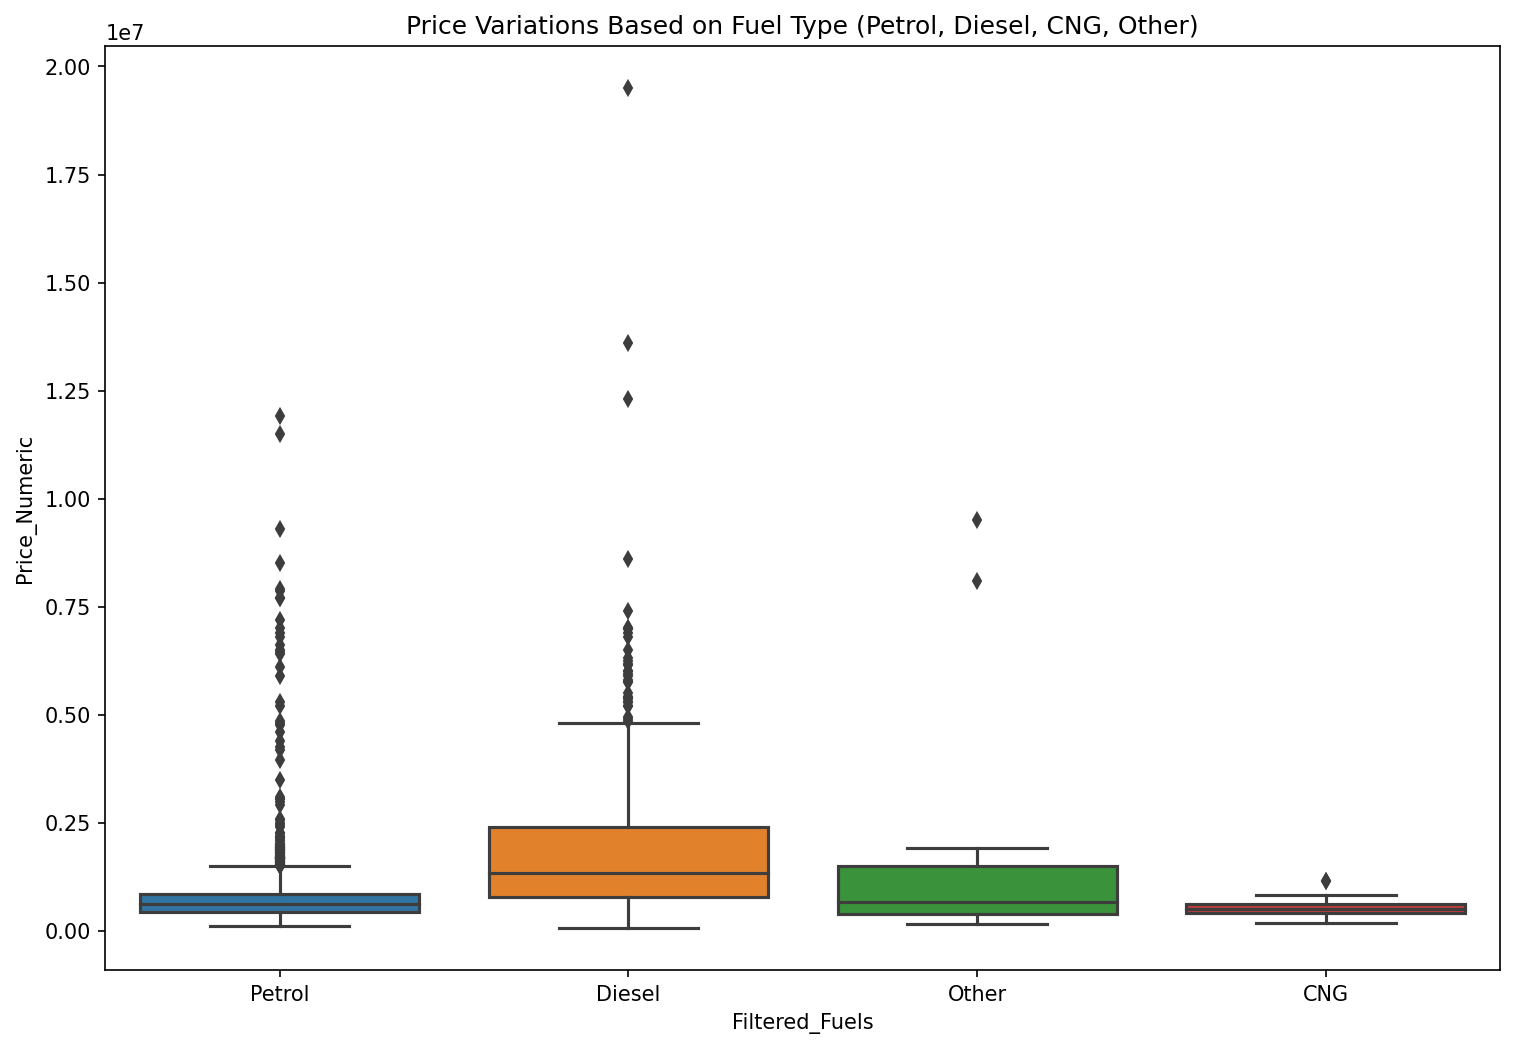

In [ ]:
plt.figure(figsize=(12,8),dpi=150)
sns.boxplot(x='Filtered_Fuels',y='Price_Numeric',data=df)
plt.title("Price Variations Based on Fuel Type (Petrol, Diesel, CNG, Other)")

Text(0.5, 1.0, 'Distribution of Price by City')

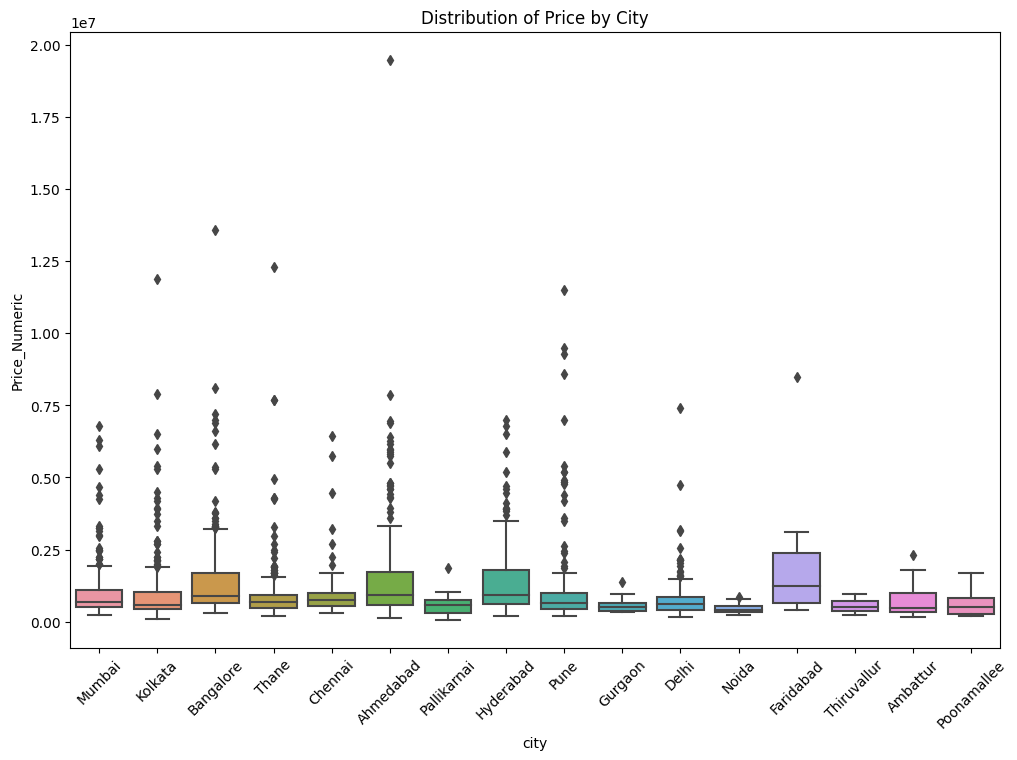

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='city', y='Price_Numeric', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Price by City')

In [ ]:
df_copy_city = df.copy()

In [ ]:
df['city'].value_counts()

Bangalore      240
Hyderabad      240
Thane          239
Ahmedabad      239
Kolkata        234
Mumbai         232
Pune           225
Delhi          174
Chennai         75
Noida           40
Ambattur        19
Pallikarnai     17
Thiruvallur     16
Gurgaon          8
Poonamallee      8
Faridabad        7
Name: city, dtype: int64

In [ ]:
lis =  ['Bangalore', 'Hyderabad', 'Thane', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Pune', 'Delhi', 'Chennai']
def cityfilter(city):
  if city in lis:
    return city
  else:
    return 'Other'

In [ ]:
df_copy_city['Filtered_City'] = df_copy_city['city'].apply(cityfilter)

In [ ]:
df_copy_city['Filtered_City'].unique()

array(['Mumbai', 'Kolkata', 'Bangalore', 'Thane', 'Chennai', 'Ahmedabad',
       'Other', 'Hyderabad', 'Pune', 'Delhi'], dtype=object)

In [ ]:
df_copy_city.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,Price_Numeric,Distance,Brand,Category,Filtered_Fuels,Filtered_City
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016,445000.0,22402.0,Hyundai,Budget,Petrol,Mumbai
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019,293000.0,10344.0,Maruti,Budget,Petrol,Kolkata
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021,2249000.0,12999.0,Tata,Luxury,Diesel,Bangalore
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016,695000.0,45000.0,Maruti,Budget,Petrol,Thane
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019,1200000.0,11193.0,Jeep,MidRange,Petrol,Kolkata


Text(0.5, 1.0, 'Distribution of Price by City')

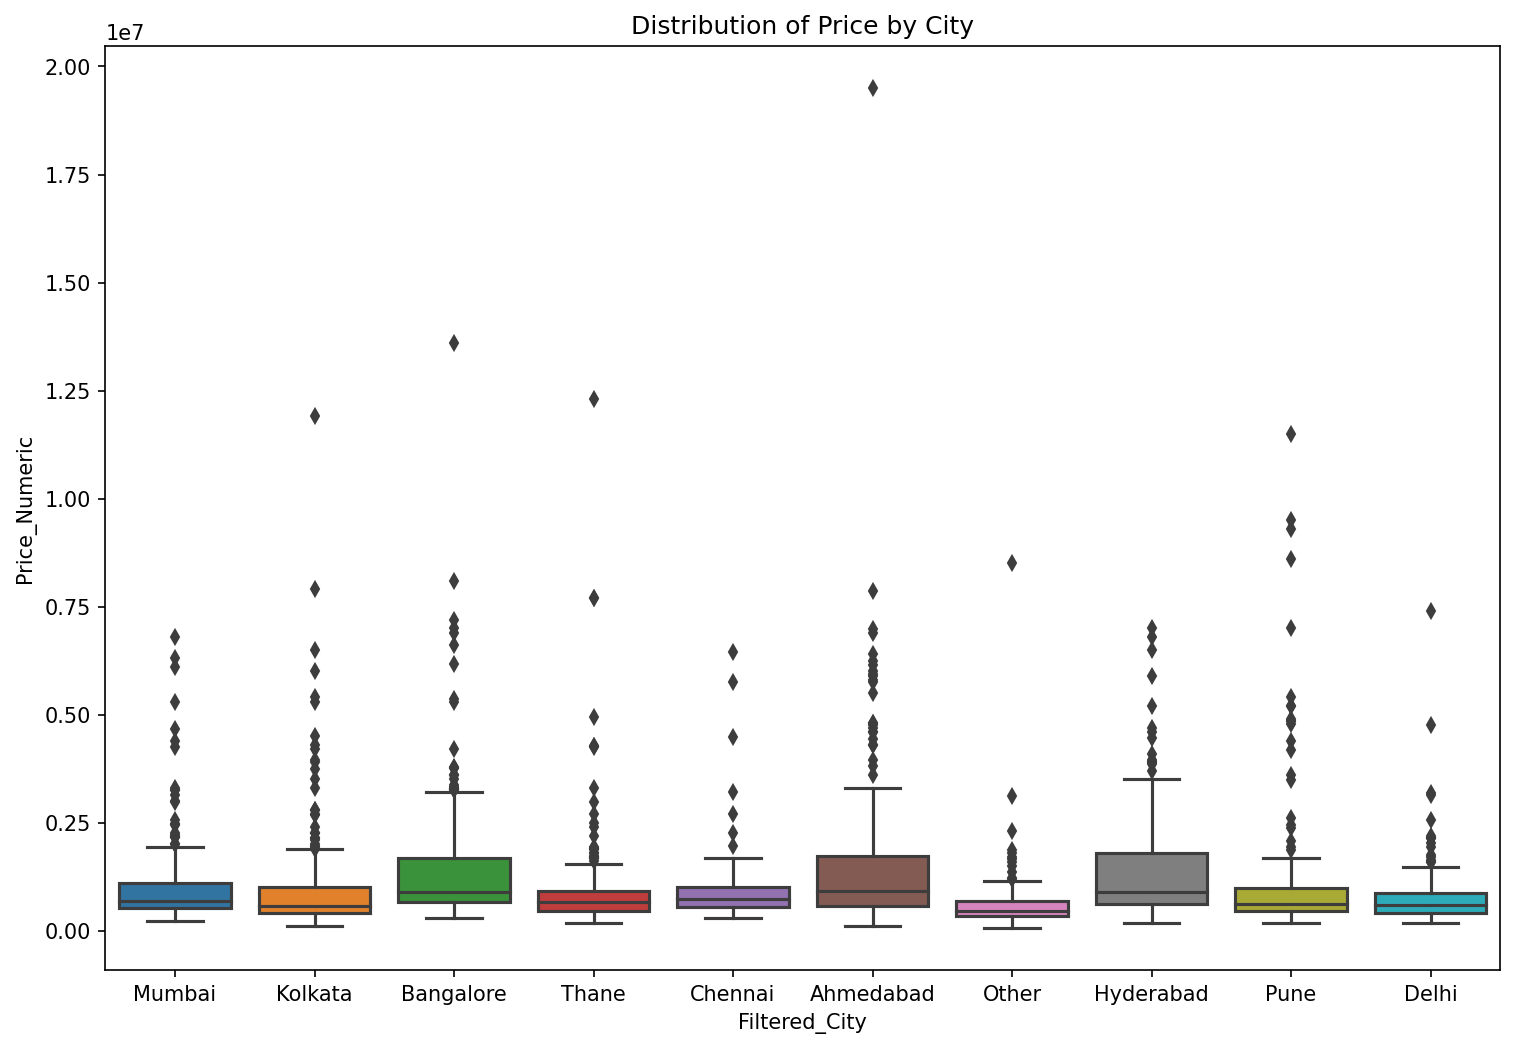

In [ ]:
plt.figure(figsize=(12,8),dpi=150)
sns.boxplot(x='Filtered_City',y='Price_Numeric',data=df_copy_city)
plt.title('Distribution of Price by City')

Text(0.5, 1.0, 'Count of all Brands')

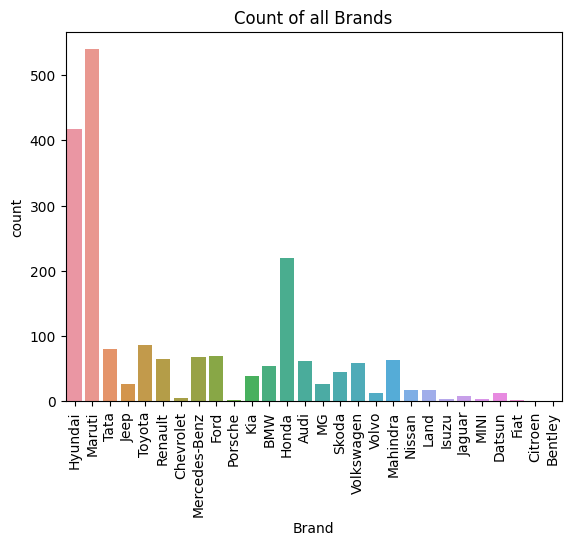

In [ ]:
sns.countplot(x='Brand',data=df_copy_city)
plt.xticks(rotation=90)
plt.title('Count of all Brands')

In [ ]:
df_copy_city['Brand'].value_counts()

Maruti           539
Hyundai          417
Honda            220
Toyota            86
Tata              81
Ford              69
Mercedes-Benz     68
Renault           65
Mahindra          64
Audi              62
Volkswagen        59
BMW               55
Skoda             45
Kia               39
MG                26
Jeep              26
Nissan            18
Land              18
Volvo             13
Datsun            13
Jaguar             9
Chevrolet          6
Isuzu              4
MINI               4
Fiat               3
Porsche            2
Citroen            1
Bentley            1
Name: Brand, dtype: int64

In [ ]:
df_brand = df_copy_city[df_copy_city['Brand'].apply(lambda x: df_copy_city['Brand'].value_counts().get(x, 0) > 20)]

In [ ]:
df_brand['Brand'].value_counts()

Maruti           539
Hyundai          417
Honda            220
Toyota            86
Tata              81
Ford              69
Mercedes-Benz     68
Renault           65
Mahindra          64
Audi              62
Volkswagen        59
BMW               55
Skoda             45
Kia               39
Jeep              26
MG                26
Name: Brand, dtype: int64

### Split the data into features and labels

In [ ]:
X = df_brand.drop(['car_name','car_price_in_rupees','kms_driven','fuel_type','city'],axis=1)
y = df_brand['Price_Numeric']

In [ ]:
X = pd.get_dummies(X, columns=['Brand', 'Filtered_Fuels','Category','Filtered_City'], drop_first=True)  # One-hot encoding

y = df_brand['Price_Numeric']

In [ ]:
X.columns

Index(['year_of_manufacture', 'Price_Numeric', 'Distance', 'Brand_BMW',
       'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Jeep', 'Brand_Kia',
       'Brand_MG', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz',
       'Brand_Renault', 'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota',
       'Brand_Volkswagen', 'Filtered_Fuels_Diesel', 'Filtered_Fuels_Other',
       'Filtered_Fuels_Petrol', 'Category_Luxury', 'Category_MidRange',
       'Category_UltraLuxury', 'Filtered_City_Bangalore',
       'Filtered_City_Chennai', 'Filtered_City_Delhi',
       'Filtered_City_Hyderabad', 'Filtered_City_Kolkata',
       'Filtered_City_Mumbai', 'Filtered_City_Other', 'Filtered_City_Pune',
       'Filtered_City_Thane'],
      dtype='object')

In [ ]:
X.corr()

,year_of_manufacture,Price_Numeric,Distance,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Jeep,Brand_Kia,Brand_MG,...,Category_UltraLuxury,Filtered_City_Bangalore,Filtered_City_Chennai,Filtered_City_Delhi,Filtered_City_Hyderabad,Filtered_City_Kolkata,Filtered_City_Mumbai,Filtered_City_Other,Filtered_City_Pune,Filtered_City_Thane
year_of_manufacture,1.000000,0.289153,-0.159498,-0.037223,-0.049898,-0.116836,-0.048729,0.065173,0.165229,0.138709,...,-0.000384,0.070363,0.104134,0.031492,-0.037231,0.003781,-4.512338e-02,-0.136417,0.064836,-0.054563
Price_Numeric,0.289153,1.000000,0.011559,0.333706,-0.015219,-0.119896,-0.173381,0.102840,0.053571,0.097555,...,0.219094,0.096613,-0.003322,-0.081643,0.073723,-0.047677,-1.405916e-02,-0.097891,-0.004528,-0.080997
Distance,-0.159498,0.011559,1.000000,0.124970,0.013999,0.004687,-0.035138,-0.015204,-0.038229,-0.034969,...,-0.006245,-0.039039,-0.014449,-0.024935,0.062867,-0.051535,-1.392599e-02,0.049169,0.039278,-0.002969
Brand_BMW,-0.037223,0.333706,0.124970,1.000000,-0.033138,-0.061743,-0.090400,-0.020110,-0.024714,-0.020110,...,-0.003918,-0.024398,-0.001925,-0.021298,0.015741,0.016363,5.129142e-03,-0.041902,-0.032983,-0.034471
Brand_Ford,-0.049898,-0.015219,0.013999,-0.033138,1.000000,-0.069417,-0.101636,-0.022609,-0.027786,-0.022609,...,-0.004405,-0.001639,-0.024100,-0.011863,-0.008819,0.026845,1.634347e-02,0.062188,-0.052484,-0.019485
Brand_Honda,-0.116836,-0.119896,0.004687,-0.061743,-0.069417,1.000000,-0.189367,-0.042125,-0.051770,-0.042125,...,-0.008207,-0.035944,-0.012527,-0.033193,-0.058885,-0.032326,1.020709e-01,0.054158,-0.033369,0.018427
Brand_Hyundai,-0.048729,-0.173381,-0.035138,-0.090400,-0.101636,-0.189367,1.000000,-0.061677,-0.075800,-0.061677,...,-0.012017,-0.001925,-0.000417,-0.002443,-0.029201,-0.019682,-2.305406e-04,-0.024361,0.057523,0.043069
Brand_Jeep,0.065173,0.102840,-0.015204,-0.020110,-0.022609,-0.042125,-0.061677,1.000000,-0.016862,-0.013720,...,-0.002673,-0.015126,-0.023446,-0.036850,0.041936,0.014244,4.112615e-02,0.010527,-0.014320,-0.001568
Brand_Kia,0.165229,0.053571,-0.038229,-0.024714,-0.027786,-0.051770,-0.075800,-0.016862,1.000000,-0.016862,...,-0.003285,0.004236,0.047904,-0.032393,-0.017599,0.017506,-6.739028e-03,-0.035135,0.016970,-0.007611
Brand_MG,0.138709,0.097555,-0.034969,-0.020110,-0.022609,-0.042125,-0.061677,-0.013720,-0.016862,1.000000,...,-0.002673,0.110241,-0.023446,0.010363,-0.014320,0.000125,-1.480542e-02,-0.009031,-0.042449,-0.015445


Text(0.5, 1.0, 'Correlation Heatmap')

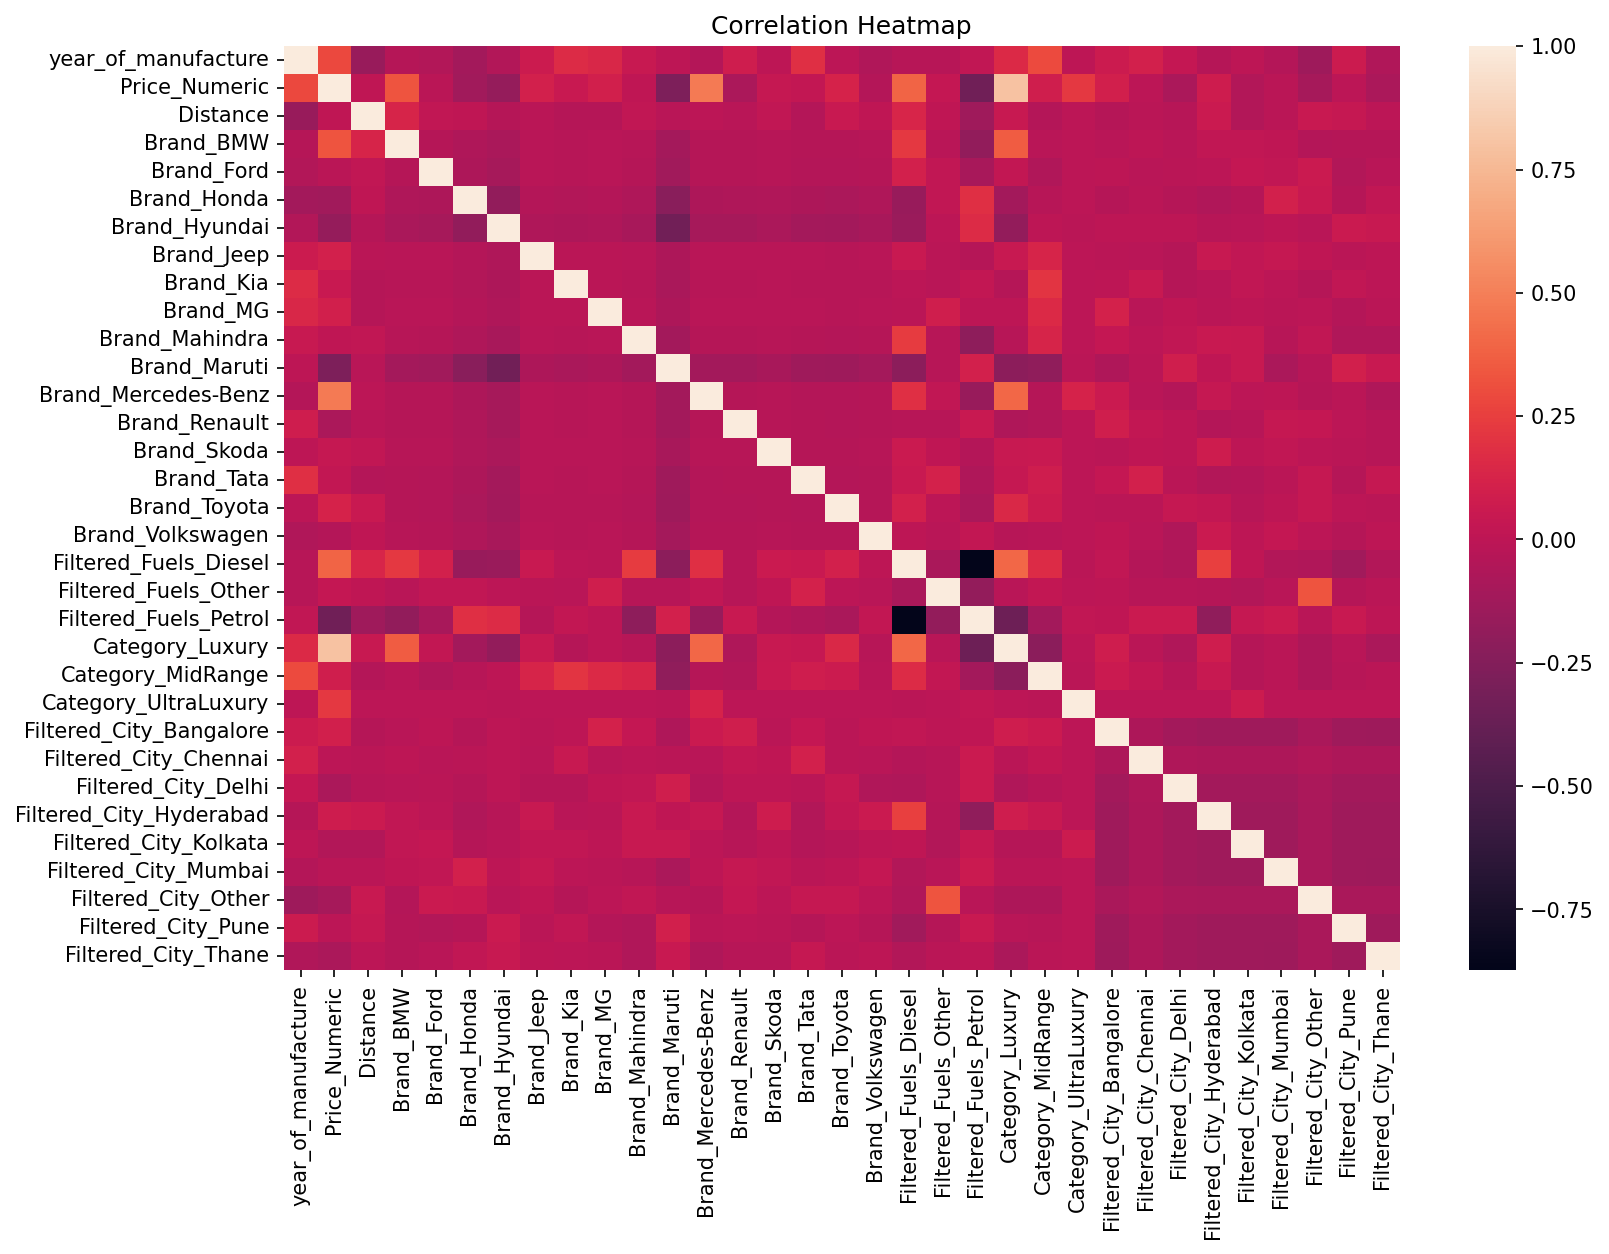

In [ ]:
plt.figure(figsize=(12,8),dpi=150)
sns.heatmap(X.corr())
plt.title('Correlation Heatmap')

In [ ]:
X.corr()['Price_Numeric'].sort_values(ascending=False)

Price_Numeric              1.000000
Category_Luxury            0.795397
Brand_Mercedes-Benz        0.476566
Filtered_Fuels_Diesel      0.385918
Brand_BMW                  0.333706
year_of_manufacture        0.289153
Category_UltraLuxury       0.219094
Brand_Toyota               0.121070
Brand_Jeep                 0.102840
Brand_MG                   0.097555
Filtered_City_Bangalore    0.096613
Category_MidRange          0.085649
Filtered_City_Hyderabad    0.073723
Brand_Kia                  0.053571
Brand_Skoda                0.041237
Filtered_Fuels_Other       0.032330
Brand_Tata                 0.019752
Distance                   0.011559
Brand_Mahindra             0.009763
Filtered_City_Chennai     -0.003322
Filtered_City_Pune        -0.004528
Filtered_City_Mumbai      -0.014059
Brand_Ford                -0.015219
Brand_Volkswagen          -0.043017
Filtered_City_Kolkata     -0.047677
Brand_Renault             -0.080793
Filtered_City_Thane       -0.080997
Filtered_City_Delhi       -0

In [ ]:
abs(X.corr()['Price_Numeric']).sort_values(ascending=False)

Price_Numeric              1.000000
Category_Luxury            0.795397
Brand_Mercedes-Benz        0.476566
Filtered_Fuels_Diesel      0.385918
Filtered_Fuels_Petrol      0.335569
Brand_BMW                  0.333706
year_of_manufacture        0.289153
Brand_Maruti               0.275335
Category_UltraLuxury       0.219094
Brand_Hyundai              0.173381
Brand_Toyota               0.121070
Brand_Honda                0.119896
Brand_Jeep                 0.102840
Filtered_City_Other        0.097891
Brand_MG                   0.097555
Filtered_City_Bangalore    0.096613
Category_MidRange          0.085649
Filtered_City_Delhi        0.081643
Filtered_City_Thane        0.080997
Brand_Renault              0.080793
Filtered_City_Hyderabad    0.073723
Brand_Kia                  0.053571
Filtered_City_Kolkata      0.047677
Brand_Volkswagen           0.043017
Brand_Skoda                0.041237
Filtered_Fuels_Other       0.032330
Brand_Tata                 0.019752
Brand_Ford                 0

**MODEL**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(scaled_X_train,y_train)
test_predictions = model.predict(scaled_X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [ ]:
MAE

1.0342956593250485e-09

In [ ]:
MSE

1.8015572381048544e-18

In [ ]:
RMSE

1.3422210094112125e-09

In [ ]:
final_model = LinearRegression()
final_model.fit(X,y)
y_hat = final_model.predict(X)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(test_predictions, y_test)
r2

1.0

In [ ]:
test_res = y_test - test_predictions

In [ ]:
X_train.head()

,year_of_manufacture,Price_Numeric,Distance,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Jeep,Brand_Kia,Brand_MG,...,Category_UltraLuxury,Filtered_City_Bangalore,Filtered_City_Chennai,Filtered_City_Delhi,Filtered_City_Hyderabad,Filtered_City_Kolkata,Filtered_City_Mumbai,Filtered_City_Other,Filtered_City_Pune,Filtered_City_Thane
367,2017,651000.0,27654.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
118,2014,385000.0,43000.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1001,2019,1012000.0,20744.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1336,2019,1445000.0,37499.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1265,2022,1895000.0,2377.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
year_of_manufacture,-4.669643e-11
Price_Numeric,1.000000e+00
Distance,9.976351e-17
Brand_BMW,-3.391793e-11
Brand_Ford,-6.006770e-12
Brand_Honda,-1.137769e-11
Brand_Hyundai,-6.965256e-12
Brand_Jeep,-1.207031e-11
Brand_Kia,-9.994803e-12
Brand_MG,-1.924278e-11


### Ridge Regularization to reduce overfitting

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=1.0)  # Initialize Ridge regression with a regularization parameter alpha
scores = cross_val_score(ridge, scaled_X_train, y_train, cv=5, scoring='r2')  # 5-fold cross-validation
print("Mean R-squared:", scores.mean())

Mean R-squared: 0.999993361344752


Text(0.5, 1.0, 'Residual Plot: Actual vs. Residuals')

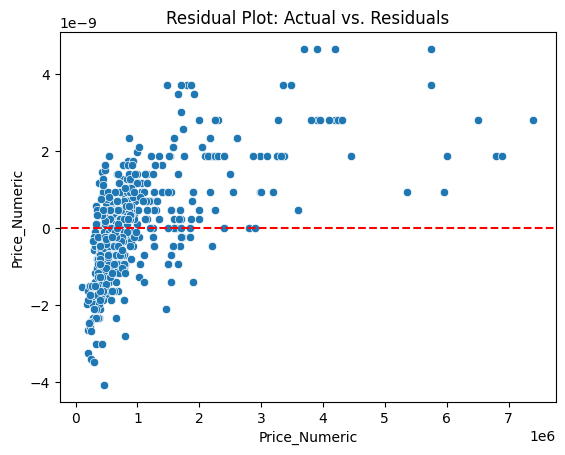

In [ ]:
test_residuals = test_predictions - y_test
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot: Actual vs. Residuals')

Text(0.5, 1.0, 'Residuals Distribution Plot')

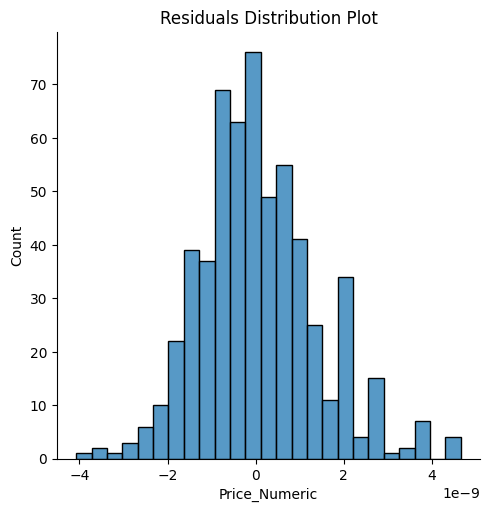

In [ ]:
sns.displot(test_residuals,bins=25)
plt.title('Residuals Distribution Plot')

In [ ]:
adjusted_r2 = 1 - ((1 - r2) * (len(y_test) - 1)) / (len(y_test) - len(X.columns) - 1)

In [ ]:
adjusted_r2

1.0

### Ridge model with cross validation


### Train|Validation|Test split

In [ ]:
from sklearn.model_selection import train_test_split

# 70% of data is training data, set aside other 30%
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.3, random_state=101)

# Remaining 30% is split into evaluation and test sets
# Each is 15% of the original data size
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_eval = scaler.transform(X_eval)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import Ridge
model_ridge = Ridge()
model_ridge.fit(X_train,y_train)
y_eval_pred = model_ridge.predict(X_eval)

In [ ]:
MSE = mean_squared_error(y_eval,y_eval_pred)
MSE

2954111.8598808446

In [ ]:
RMSE = np.sqrt(MSE)
RMSE

1718.7529955990897

In [ ]:
test_res = y_eval - y_eval_pred

Text(0.5, 1.0, 'Residual Plot: Actual vs. Residuals')

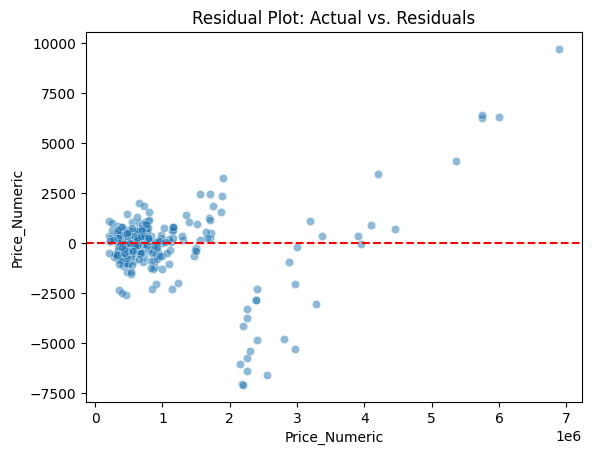

In [ ]:
sns.scatterplot(x=y_eval,y=test_res,alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot: Actual vs. Residuals')

(0.0, 1500000.0)

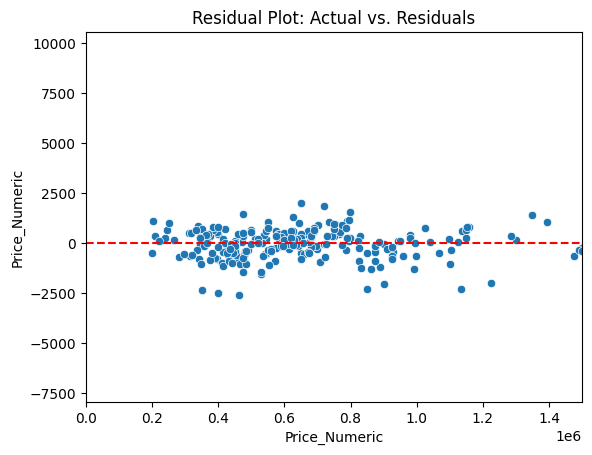

In [ ]:
sns.scatterplot(x=y_eval,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot: Actual vs. Residuals')
plt.xlim(0,1500000)

Text(0.5, 1.0, 'Residuals Distribution Plot')

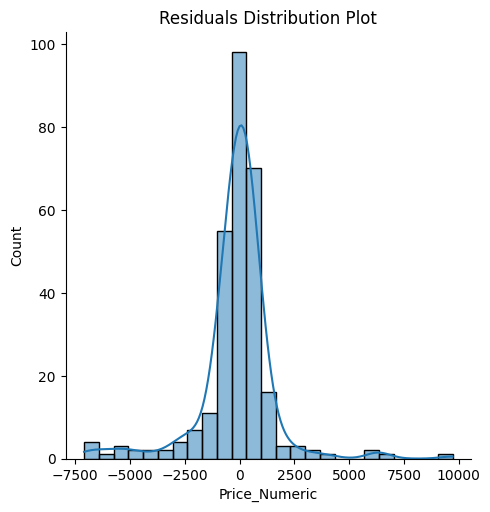

In [ ]:
sns.displot(test_res,bins=25,kde=True)
plt.title('Residuals Distribution Plot')

In [ ]:
y_final_test_pred = model_ridge.predict(X_test)

In [ ]:
MSE = mean_squared_error(y_test,y_final_test_pred)
MSE

2977572.908436522

In [ ]:
RMSE = np.sqrt(MSE)
RMSE

1725.5645187695886

## K-fold cross validation

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(model_ridge,X_train,y_train,
                         scoring=['neg_mean_absolute_error','neg_mean_squared_error','max_error'],cv=5)

In [ ]:
scores

{'fit_time': array([0.00638628, 0.00393462, 0.0030129 , 0.0067749 , 0.00434208]),
 'score_time': array([0.00180387, 0.00163531, 0.0015533 , 0.00173545, 0.00196457]),
 'test_neg_mean_absolute_error': array([-1752.38680708, -1591.924436  , -1254.0381508 , -1348.09241355,
        -1145.14077326]),
 'test_neg_mean_squared_error': array([-15779824.70866987, -10480886.87739971,  -5080297.3809964 ,
        -12074546.8720483 ,  -4322645.19603086]),
 'test_max_error': array([-32093.18686549, -24209.6558365 , -14249.94793298, -46227.38555665,
        -15286.00290163])}

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


Text(0, 0.5, 'year_of_manufacture')

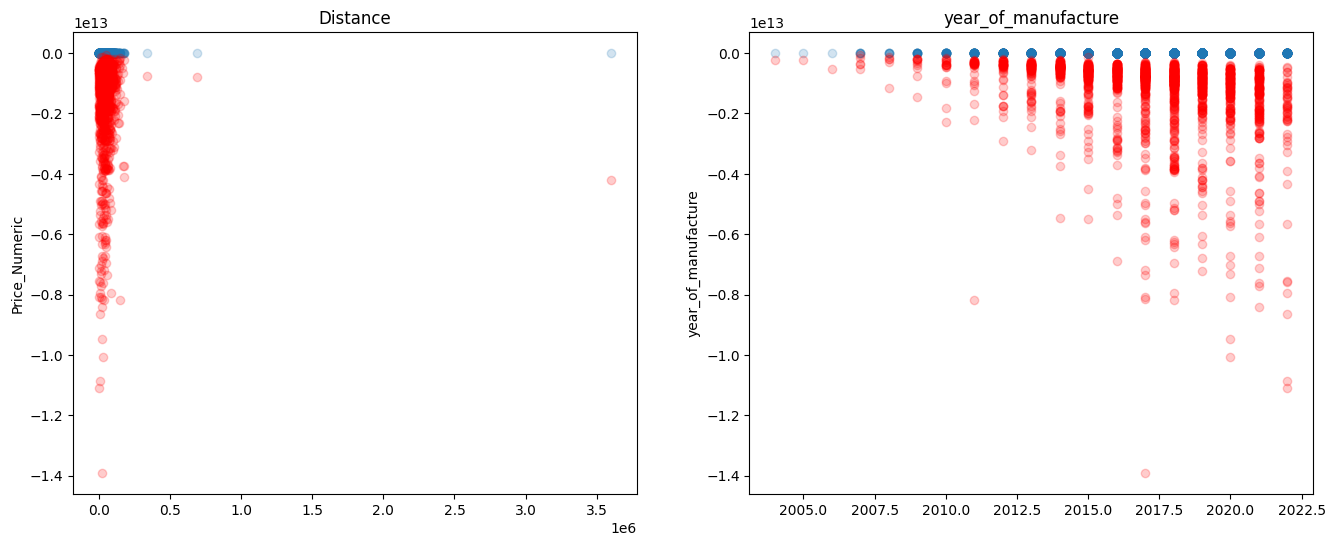

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(16,6))
y_hat = y - model_ridge.predict(X)
axes[0].plot(df_brand['Distance'],df_brand['Price_Numeric'],'o',alpha=0.2)
axes[0].plot(df_brand['Distance'],y_hat,'o',color='red',alpha=0.2)
axes[0].set_ylabel("Price_Numeric")
axes[0].set_title("Distance")

axes[1].plot(df_brand['year_of_manufacture'],df_brand['Price_Numeric'],'o',alpha=0.2)
axes[1].plot(df_brand['year_of_manufacture'],y_hat,'o',color='red',alpha=0.2)
axes[1].set_title("year_of_manufacture")
axes[1].set_ylabel("year_of_manufacture")



### Lasso Regularization

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
lasso_cv_model.fit(scaled_X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [ ]:
test_predictions = lasso_cv_model.predict(scaled_X_test)

In [ ]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [ ]:
MAE

67696.58942717365

In [ ]:
RMSE

101571.3299747619

In [ ]:
test_res = y_test - test_predictions

Text(0.5, 1.0, 'Residuals Distribution Plot')

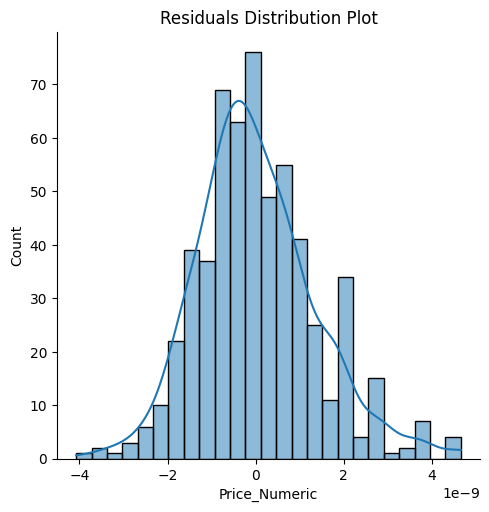

In [ ]:
sns.displot(test_residuals,bins=25,kde=True)
plt.title('Residuals Distribution Plot')

### Elastic Net(Comibination of ridge and lass)

In [ ]:
from sklearn.linear_model import ElasticNetCV

In [ ]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)


In [ ]:
elastic_model.fit(scaled_X_train,y_train,)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [ ]:
test_predictions = elastic_model.predict(scaled_X_test)

In [ ]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [ ]:
MAE

6788.302134015633

In [ ]:
RMSE

8881.338687914073

In [ ]:
train_predictions = elastic_model.predict(scaled_X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

7074.743424362125

In [ ]:
elastic_model.coef_

array([ 8.02863787e+03,  1.15848011e+06, -0.00000000e+00, -0.00000000e+00,
       -5.02733229e+03, -7.13382463e+03, -9.72783278e+03, -0.00000000e+00,
       -1.09831788e+03, -0.00000000e+00, -5.24182319e+03, -1.09044695e+04,
        1.11829882e+03, -4.09012272e+03, -1.62738712e+03, -3.55466520e+03,
       -1.02084218e+03, -2.84704550e+03,  4.34498255e+03,  0.00000000e+00,
       -0.00000000e+00,  1.21728136e+03, -1.98882740e+03,  2.15242389e+03,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

Text(0.5, 1.0, 'Residual Plot: Actual vs. Residuals')

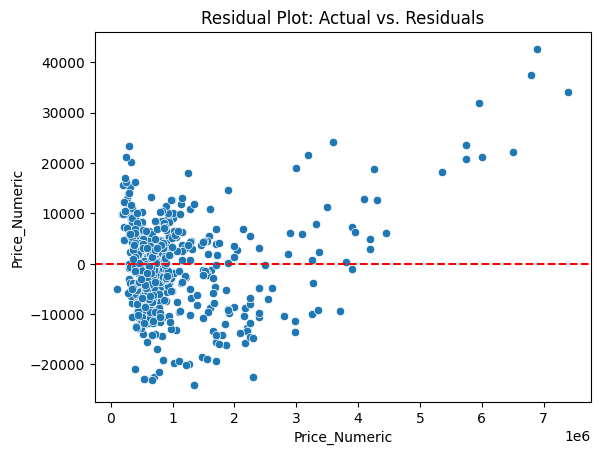

In [ ]:
test_res = y_test - test_predictions
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot: Actual vs. Residuals')

Text(0.5, 1.0, 'Residuals Distribution Plot')

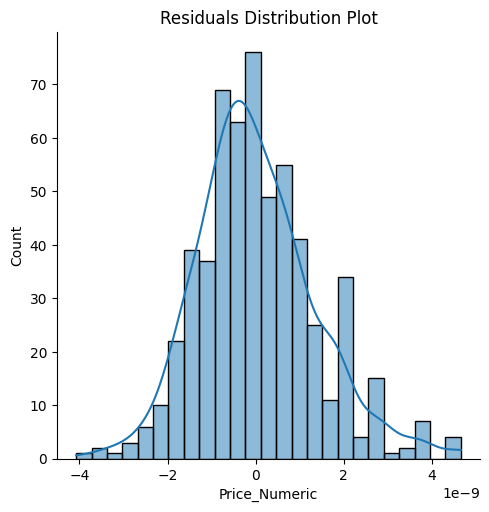

In [ ]:
sns.displot(test_residuals,bins=25,kde=True)
plt.title('Residuals Distribution Plot')

### **Grid Search for finding the best hyper parameters**

In [ ]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0],  # Regularization strength
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Solver for optimization
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(model_ridge, param_grid, cv=5)
grid_search.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10.0],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']})

In [ ]:
best_params = grid_search.best_params_
Best_Estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict using the best estimator on test data
predicted_values_best = Best_Estimator.predict(scaled_X_test)
print("Predicted values for scaled test data using best estimator:", predicted_values_best)

# Evaluate the best estimator (optional)
mse_best = mean_squared_error(y_test,predicted_values_best)
print("Mean Squared Error using best estimator:", mse_best)

Best Parameters: {'alpha': 0.1, 'solver': 'lsqr'}
Predicted values for scaled test data using best estimator: [1619740.8174326   430060.36014364  299117.50904819  598986.33491306
 1597997.20623504  991124.38439574  530996.35612364 1260055.61329909
  540049.40481319 1064062.45791746  794993.67366534  433091.74742922
  324876.44296955  549122.33946573  369947.54139573  529068.57724943
  284929.44449165  424977.31065212  269977.74457351  894986.67231581
 1724946.17039799  590015.66426136 4198659.45866452  598951.93977644
  343078.27049501  825091.00459099 3188888.55926589  519979.0263055
  674960.61863064 1689871.82500126  534066.35074496 1224879.3239402
  899043.62761229  349007.23120973  439022.26153538  788982.65625783
 1849817.15497152  749960.29395184  729948.61800439  708996.22176173
  649080.94193295 1589863.30002459 1149977.3433803   110084.85025982
  374963.65692808 1050144.90571812  450021.27870865  445048.7978143
 1698781.15193712 2175707.33078464  510972.71213239  999004.88584

In [ ]:
np.sqrt(mse_best)

173.80357075941447

In [ ]:
best_params

{'alpha': 0.1, 'solver': 'lsqr'}

### **After conducting a grid search analysis, it was established that the Ridge model demonstrates the most favorable performance, showcasing the lowest RMSE.**